<a href="https://colab.research.google.com/github/archeopteryx-bit/cmcrepo/blob/main/start_pymorphy_syntagrus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Установка библиотек

In [ ]:
!pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 38.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=d52e64f423b1fe255ec9f4058eec9bbe63be28d7bac36043a8804224d7277569
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


# Получение текущей версии кода

In [ ]:
!git clone https://github.com/archeopteryx-bit/cmcrepo.git

Cloning into 'cmcrepo'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 29 (delta 9), reused 21 (delta 6), pack-reused 0
Receiving objects: 100% (29/29), 3.10 MiB | 6.22 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [ ]:
import sys
sys.path.insert(0, '/content/cmcrepo')

# Импорт функций

In [ ]:
from dictmake import check_pos, word_occured, check_word, main_dict_create
# TODO
from readstr import main_read

# Получение информации из SynTagRus

In [ ]:
# TODO
import pymorphy2

morph = pymorphy2.MorphAnalyzer()

sents, complex_sents = main_read("/content/cmcrepo/ru_syntagrus-ud-test.conllu")

occur_dict = dict()

for n_sent in range(len(sents)):
  for word in sents[n_sent].words:
    word_occured(occur_dict, sents[n_sent].sent_id, word)

for n_sent in range(len(complex_sents)):
  for word in complex_sents[n_sent].words:
    word_occured(occur_dict, complex_sents[n_sent].sent_id, word)

suited_parses = dict()

for n_sent in range(len(sents)):
  for word in sents[n_sent].words:
    check_word(morph, suited_parses, word)

for n_sent in range(len(complex_sents)):
  for word in complex_sents[n_sent].words:
    check_word(morph, suited_parses, word)

# TODO: Следующие этапы

График количества подходящих разборов

In [ ]:
right_parses_count = dict()

counts_parses = []
counts_word = []

for cord_key in suited_parses:
  count = len(suited_parses[cord_key])
  if count not in right_parses_count:
    right_parses_count[count] = 1
  else:
    right_parses_count[count] += 1

for count in sorted(right_parses_count):
  counts_parses.append(count)
  counts_word.append(right_parses_count[count])
  print(count, ': ', right_parses_count[count])

0 :  8259
1 :  29756
2 :  520
3 :  19
4 :  13
5 :  8
6 :  15
7 :  4
8 :  3
9 :  2
11 :  1
12 :  8
14 :  2
18 :  2
20 :  3
24 :  1
25 :  4
28 :  1
36 :  1
37 :  1


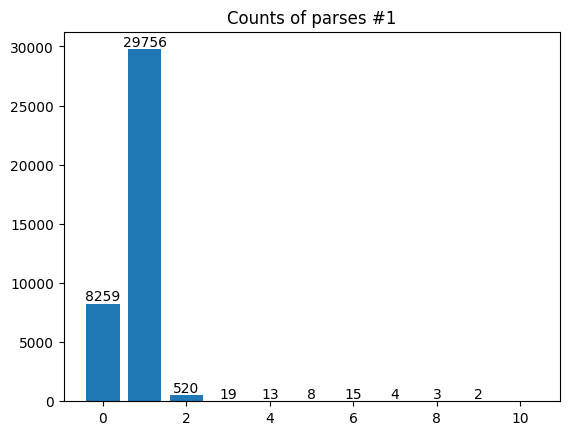

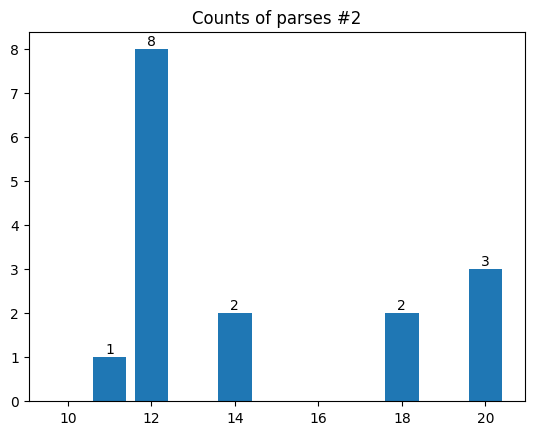

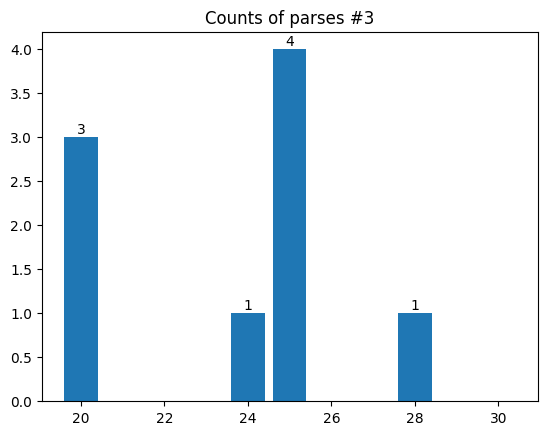

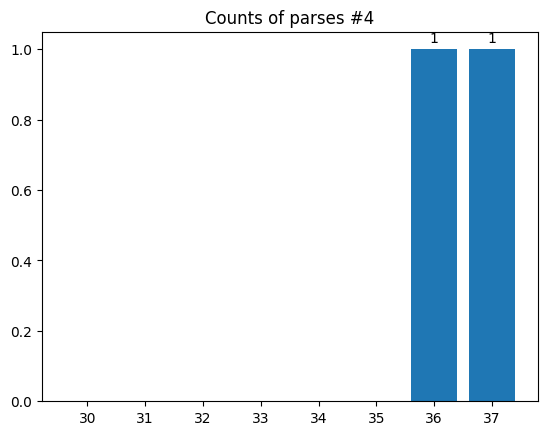

In [ ]:
import matplotlib.pyplot as plt

labels_for_hist = [0] * (max(right_parses_count.keys()) + 1)

counts_word = [0] * (max(right_parses_count.keys()) + 1)
counts_parses = [0] * (max(right_parses_count.keys()) + 1)

for i in range(max(right_parses_count.keys()) + 1):
  counts_word[i] = i
  if i in right_parses_count:
    counts_parses[i] = right_parses_count[i]
    labels_for_hist[i] = right_parses_count[i]

for i in [11, 21, 31, 41]:
  fig, ax = plt.subplots(1, 1)
  ax.bar(counts_word[i-11:i], counts_parses[i-11:i])
  ax.set_title(f'Counts of parses #{i // 10}')
  rects = ax.patches
  for rect, label in zip(rects, labels_for_hist[i-11:i]):
    height = rect.get_height()
    if label != 0:
      ax.text(rect.get_x() + rect.get_width() / 2, height + 0.01,
            label, ha='center', va='bottom')

График вероятностей всех разборов

In [ ]:
score_list = []
for cord_key in suited_parses:
  if suited_parses[cord_key]:
    for parse in suited_parses[cord_key]:
      score_list.append(parse[3])

In [ ]:
score_dict = {'01': 0,
              '02': 0,
              '03': 0,
              '04': 0,
              '05': 0,
              '06': 0,
              '07': 0,
              '08': 0,
              '09': 0,
              '1': 0}

for score in score_list:
  if 0 <= score <= 0.1:
    score_dict['01'] += 1
  elif 0.1 < score <= 0.2:
    score_dict['02'] += 1
  elif 0.2 < score <= 0.3:
    score_dict['03'] += 1
  elif 0.3 < score <= 0.4:
    score_dict['04'] += 1
  elif 0.4 < score <= 0.5:
    score_dict['05'] += 1
  elif 0.5 < score <= 0.6:
    score_dict['06'] += 1
  elif 0.6 < score <= 0.7:
    score_dict['07'] += 1
  elif 0.7 < score <= 0.8:
    score_dict['08'] += 1
  elif 0.8 < score <= 0.9:
    score_dict['09'] += 1
  elif 0.9 < score <= 1:
    score_dict['1'] += 1

for i in sorted(score_dict.keys()):
  print(i, ': ', score_dict[i])

01 :  1786
02 :  2413
03 :  2106
04 :  3330
05 :  5100
06 :  1294
07 :  1763
08 :  1435
09 :  999
1 :  11335


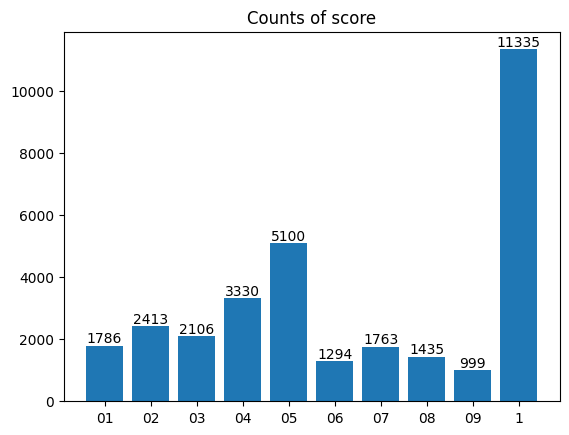

In [ ]:
labels_for_hist = [0] * 10

score = [0] * 10
counts_score = [0] * 10

k = 0
for i in score_dict:
  score[k] = i
  counts_score[k] = score_dict[i]
  labels_for_hist[k] = score_dict[i]
  k += 1

fig, ax = plt.subplots(1, 1)
ax.bar(score, counts_score)
ax.set_title('Counts of score')
rects = ax.patches
for rect, label in zip(rects, labels_for_hist):
  height = rect.get_height()
  if label != 0:
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.01,
          label, ha='center', va='bottom')

График с максимольной вероятностью среди всех подходящих разборов

In [ ]:
parses = []
for word_key in suited_parses:
  if suited_parses[word_key]:
    parses.append(suited_parses[word_key])
max_score_list = []
for parse in parses:
  help_list = []
  for p in parse:
    help_list.append(p[3])
  max_score_list.append(max(help_list))

In [ ]:
max_score_dict = {'01': 0,
                  '02': 0,
                  '03': 0,
                  '04': 0,
                  '05': 0,
                  '06': 0,
                  '07': 0,
                  '08': 0,
                  '09': 0,
                  '1': 0}

for score in max_score_list:
  if 0 <= score <= 0.1:
    max_score_dict['01'] += 1
  elif 0.1 < score <= 0.2:
    max_score_dict['02'] += 1
  elif 0.2 < score <= 0.3:
    max_score_dict['03'] += 1
  elif 0.3 < score <= 0.4:
    max_score_dict['04'] += 1
  elif 0.4 < score <= 0.5:
    max_score_dict['05'] += 1
  elif 0.5 < score <= 0.6:
    max_score_dict['06'] += 1
  elif 0.6 < score <= 0.7:
    max_score_dict['07'] += 1
  elif 0.7 < score <= 0.8:
    max_score_dict['08'] += 1
  elif 0.8 < score <= 0.9:
    max_score_dict['09'] += 1
  elif 0.9 < score <= 1:
    max_score_dict['1'] += 1

for i in sorted(max_score_dict.keys()):
  print(i, ': ', max_score_dict[i])

01 :  1118
02 :  2183
03 :  1974
04 :  3275
05 :  4993
06 :  1292
07 :  1762
08 :  1435
09 :  997
1 :  11335


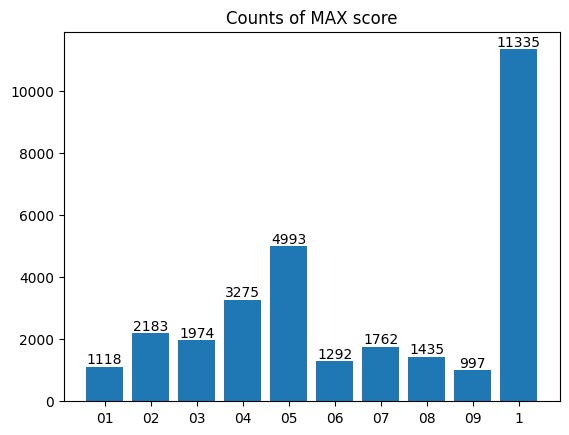

In [ ]:
labels_for_hist = [0] * 10

score = [0] * 10
counts_score = [0] * 10

k = 0
for i in max_score_dict:
  score[k] = i
  counts_score[k] = max_score_dict[i]
  labels_for_hist[k] = max_score_dict[i]
  k += 1

fig, ax = plt.subplots(1, 1)
ax.bar(score, counts_score)
ax.set_title('Counts of MAX score')
rects = ax.patches
for rect, label in zip(rects, labels_for_hist):
  height = rect.get_height()
  if label != 0:
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.01,
          label, ha='center', va='bottom')